<a href="https://colab.research.google.com/github/iamakshay0228/linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name**-YES BANK STOCK CLOSING PRICE PREDICTION

---



##**Contribuition**- Individual

##**Submitted By** - Akshay Ingle

## **GitHub Link**- https://github.com/iamakshay0228/linear-regression.git

## PROJECT DESCRIPTION

---



# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

# PROBLEM STATEMENT  

---
The main objective is to predict the stock’s closing price of the month.


In [1]:
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso,Ridge,ElasticNet)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-5fb873ac7b93>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
url='https://drive.google.com/file/d/1qE-lEu9VDFTQ26ivGoBpg4Ztoe1sek7f/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
YB_df=pd.read_csv(url)

In [3]:
YB_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
YB_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## Exploratory Data Anlysis

In [5]:
YB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
YB_df['Date'] = pd.to_datetime(YB_df['Date'],format='%b-%y').dt.strftime('%y-%m-%d')

In [7]:
YB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


<Axes: xlabel='Close', ylabel='Density'>

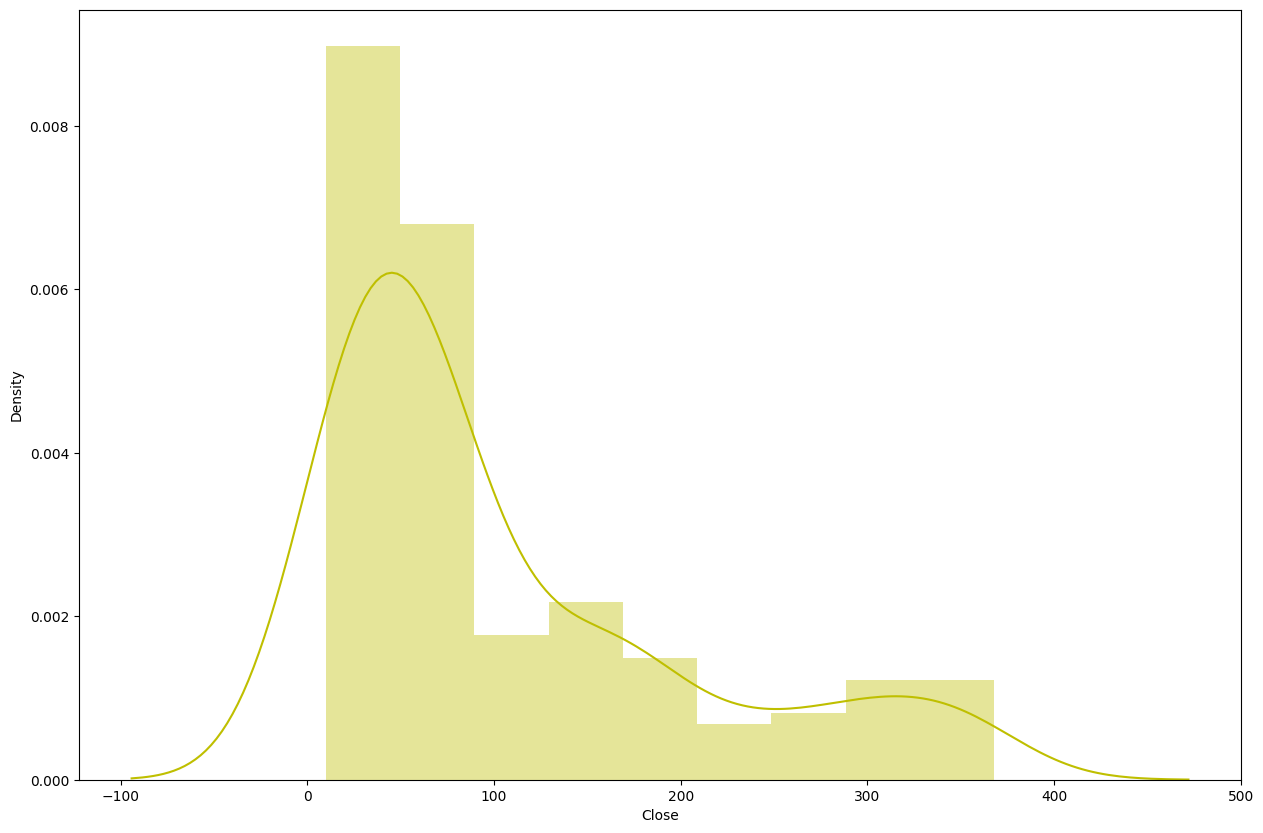

In [8]:
# dependent variable 'Close'
plt.figure(figsize=(15,10))
sns.distplot(YB_df['Close'],color="y")

<Axes: xlabel='Close', ylabel='Density'>

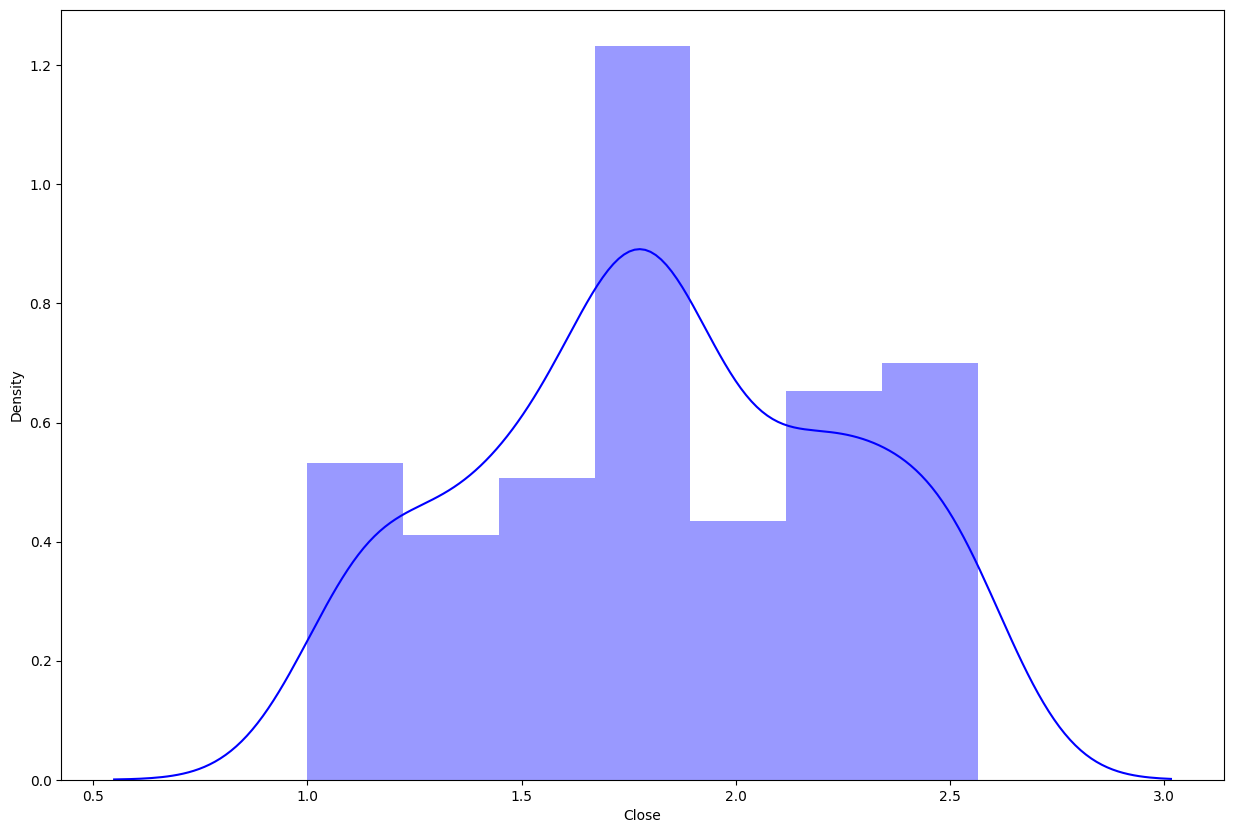

In [9]:
# Dependent variable 'Close'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(YB_df['Close']),color="b")

##Data Distribution and mean and median of each single Indpendent variable

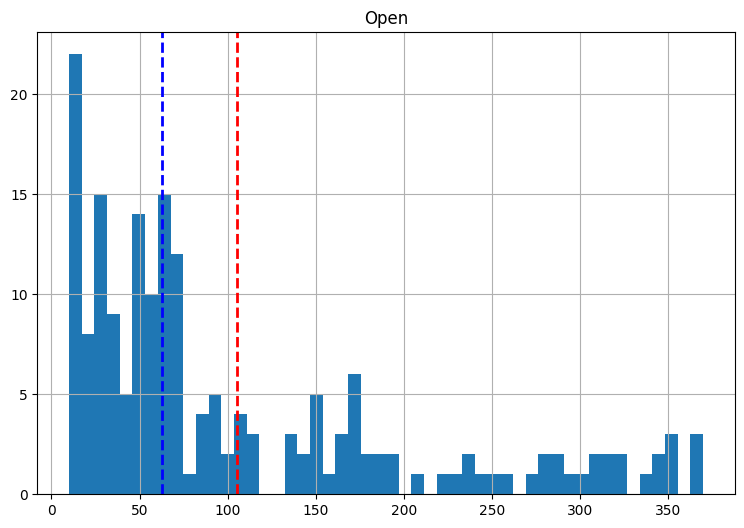

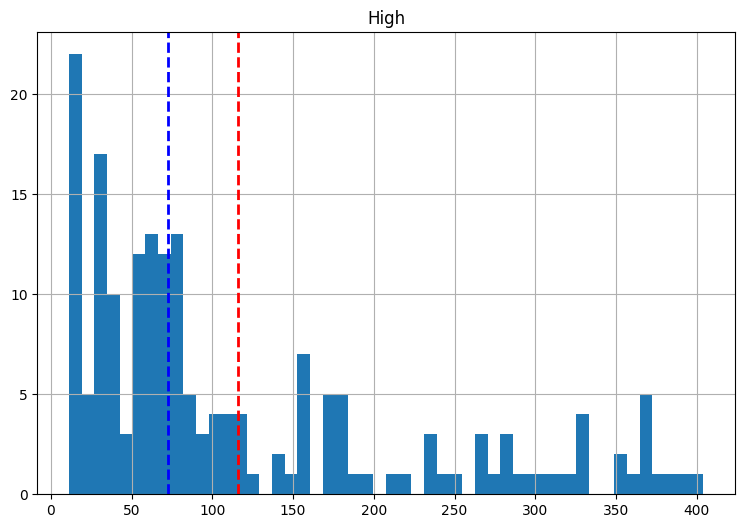

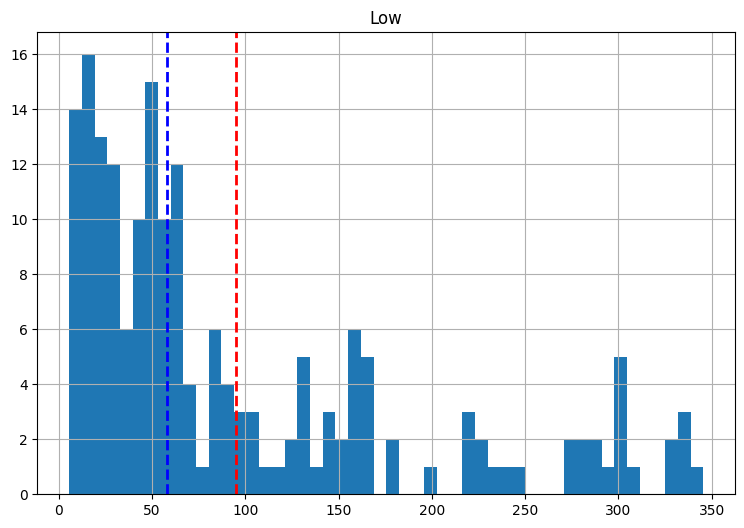

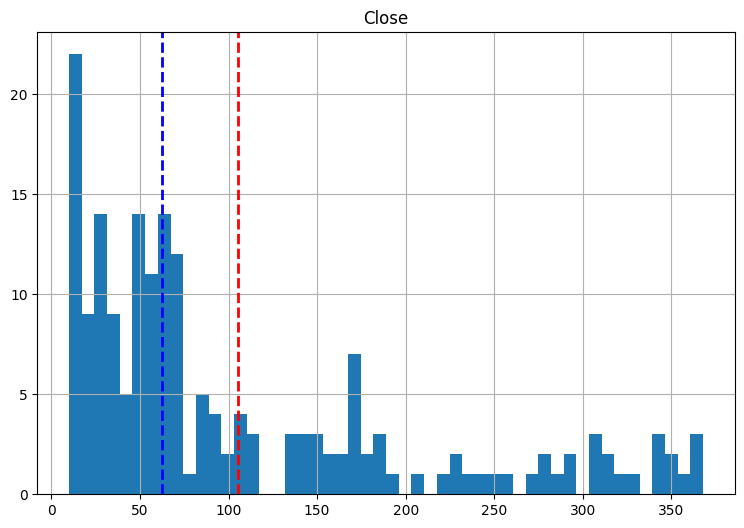

In [10]:
# plot a bar plot for each categorical feature count
numeric_features= YB_df.describe().columns
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YB_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [11]:
import plotly.express as px

fig = px.line(YB_df, x='Date', y="Close")
fig.show()

## Checking for the correlation among variables

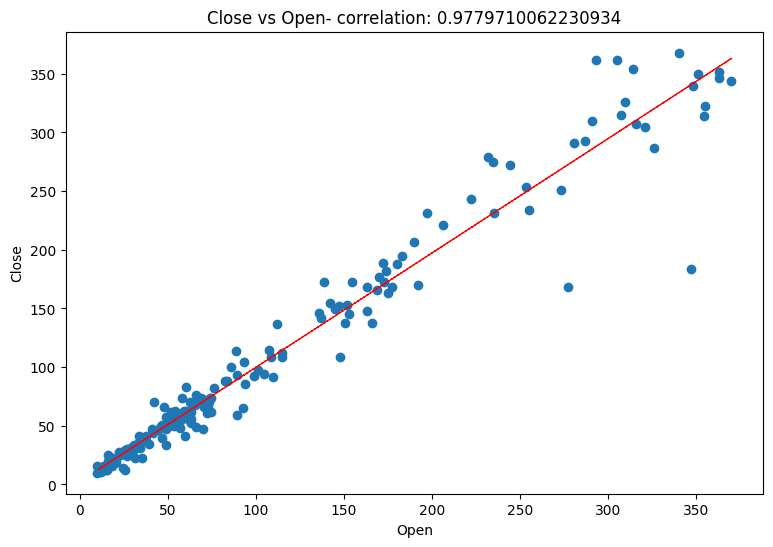

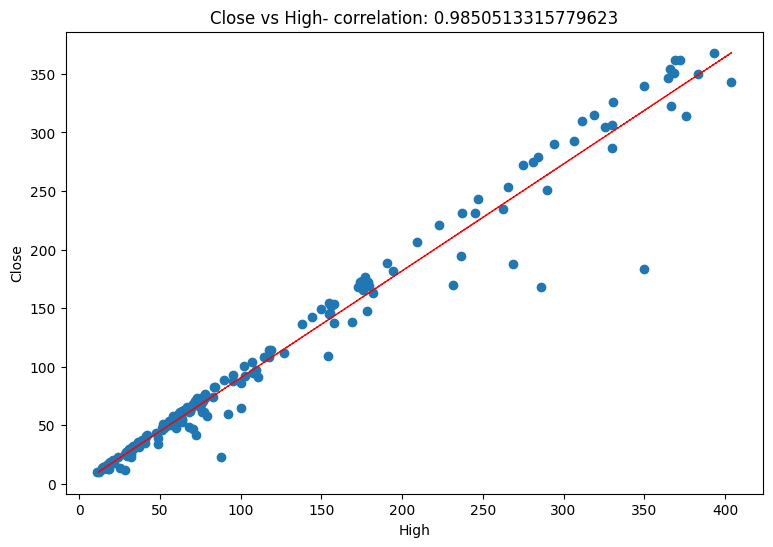

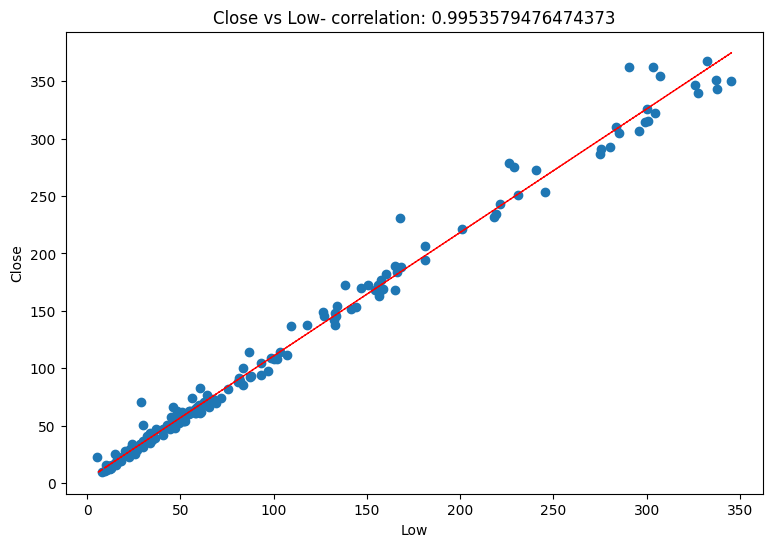

In [19]:
for col in numeric_features[0:3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YB_df[col]
    label = YB_df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(YB_df[col], YB_df['Close'], 1)
    y_hat = np.poly1d(z)(YB_df[col])

    plt.plot(YB_df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

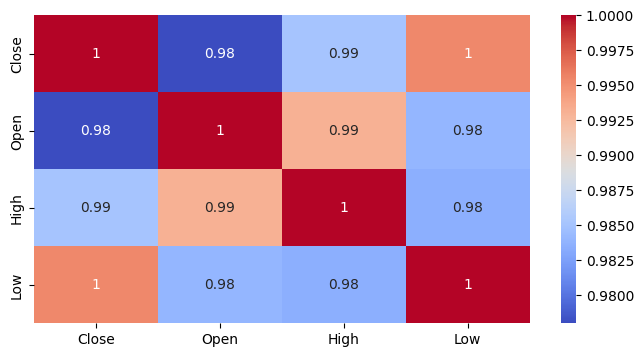

In [13]:
plt.figure(figsize=(8,4))
correlation = YB_df[['Close','Open','High','Low']].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##Data Preprocessing

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [22]:
calc_vif(YB_df[[i for i in YB_df.describe().columns if i not in['Date'] ]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

<Axes: >

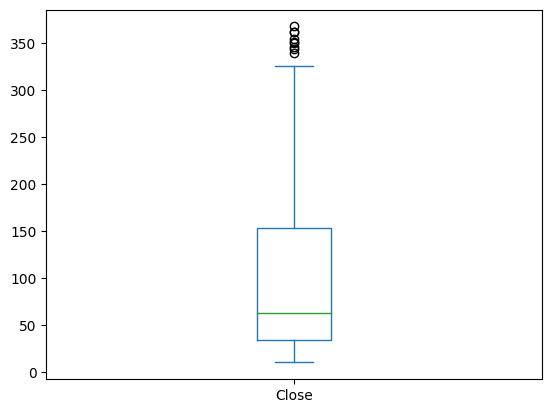

In [14]:
YB_df['Close'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7e67321fc730>,
 'caps': [<matplotlib.lines.Line2D at 0x7e67321fcc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e67321fc490>],
 'medians': [<matplotlib.lines.Line2D at 0x7e67321fd1b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e67321fd450>],
 'means': []}

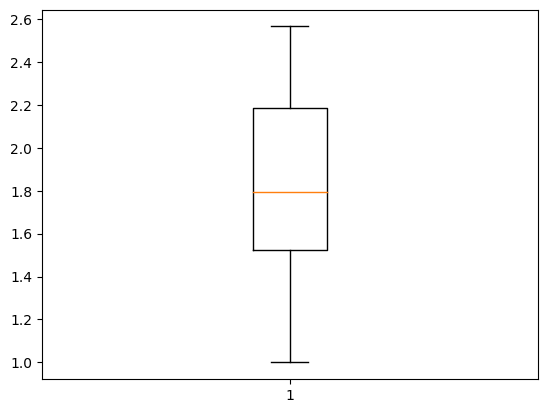

In [15]:
plt.boxplot(x=np.log10(YB_df['Close']))

<Axes: >

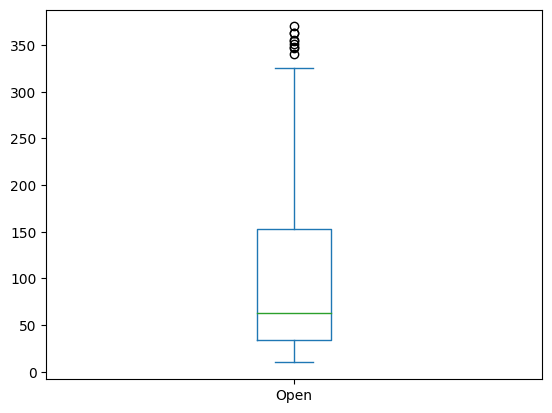

In [16]:
YB_df['Open'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7e673230e980>,
 'caps': [<matplotlib.lines.Line2D at 0x7e673230ed40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e673207abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e67320a47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e67320a5300>],
 'means': []}

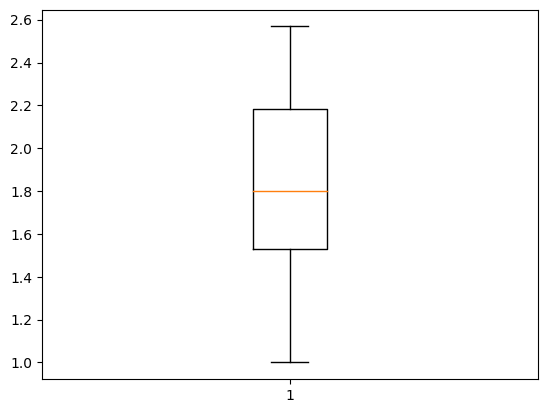

In [17]:
plt.boxplot(x=np.log10(YB_df['Open']))

<Axes: >

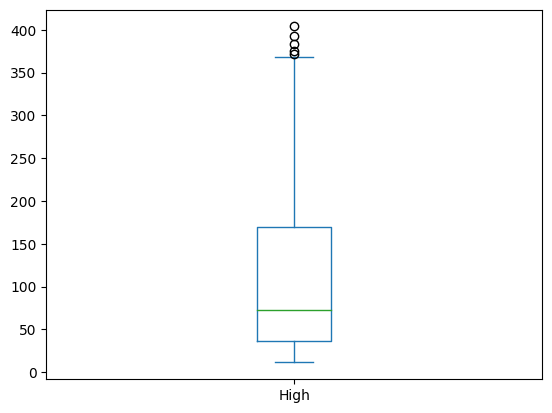

In [18]:
YB_df['High'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7e6731fd2380>,
 'caps': [<matplotlib.lines.Line2D at 0x7e6731fd26e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6731fd20e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e6731fd2c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e6731fd2ef0>],
 'means': []}

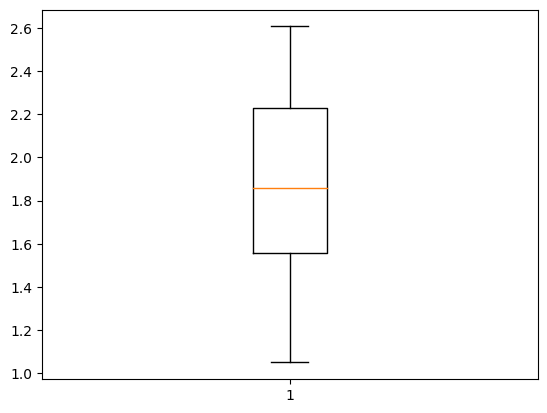

In [19]:
plt.boxplot(x=np.log10(YB_df['High']))

<Axes: >

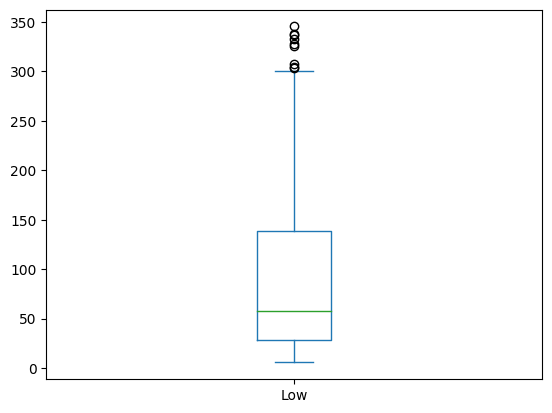

In [20]:
YB_df['Low'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x7e6731ebe7a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e6731ebece0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6731ebe500>],
 'medians': [<matplotlib.lines.Line2D at 0x7e6731ebf220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e6731ebf4c0>],
 'means': []}

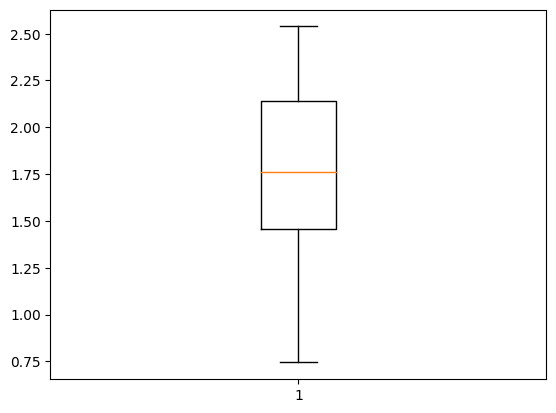

In [21]:
plt.boxplot(x=np.log10(YB_df['Low']))

In [29]:
dependent_variable ='Close'
independent_variable= 'High','Low','Open'

In [30]:
Y= np.log10(YB_df['Close'])
X= YB_df[['High','Low','Open',]].apply(np.log10)

## Scaling the Data

In [31]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

## Splitting the Data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


###M L MODEL NO 1###

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)

In [34]:
reg.score(X_train, Y_train)

0.9947900553430551

In [35]:
reg.coef_

array([ 1.28504922,  1.30428821, -0.8604515 ])

In [36]:
reg.intercept_

0.8498815599425611

In [37]:
Y_pred = reg.predict(X_test)

In [38]:
Y_pred

array([1.4912247 , 2.14465448, 1.67394233, 2.14226908, 1.82201368,
       1.50794844, 2.36203842, 1.21545331, 1.1371433 , 2.35044359,
       2.47496559, 1.94884657, 2.17801307, 1.76486858, 2.52493353,
       2.42732103, 1.86087272, 1.44166154, 2.43034707, 1.70644715,
       0.97157347, 2.07290633, 2.1784174 , 1.76898738, 2.3338384 ,
       1.71921499, 2.40515731, 1.12251144, 2.02871592, 1.72293253,
       2.57183854, 2.55026271, 1.86725537, 2.22192748, 1.59041597,
       1.67502755, 2.41083039])

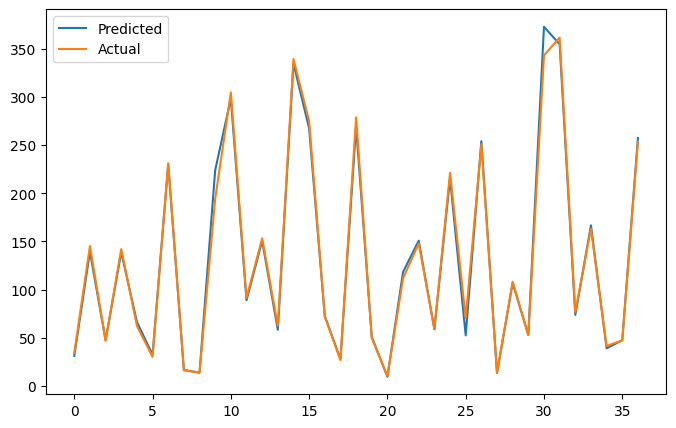

In [39]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred))
plt.plot(np.array(10**(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 70.42040616145343
RMSE : 8.391686729225146


In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9956268809883747
Adjusted R2 :  0.9931749354298977


#ML Model 2
##**Ridge Regression with cross validation**

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [43]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [44]:
Y_pred_ridge

array([1.49487587, 2.14780071, 1.68437229, 2.14252001, 1.81897108,
       1.50312808, 2.36268268, 1.21597054, 1.13912792, 2.34220405,
       2.47684861, 1.95484499, 2.17873971, 1.76696342, 2.52621502,
       2.42187258, 1.86109204, 1.43967481, 2.42408669, 1.70851958,
       0.97463752, 2.0718606 , 2.17971876, 1.76681043, 2.33244141,
       1.70518842, 2.40635072, 1.12558043, 2.02965617, 1.72873807,
       2.57043622, 2.54217312, 1.86396329, 2.22338443, 1.59008323,
       1.67725184, 2.41044394])

In [45]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.00129435181535511


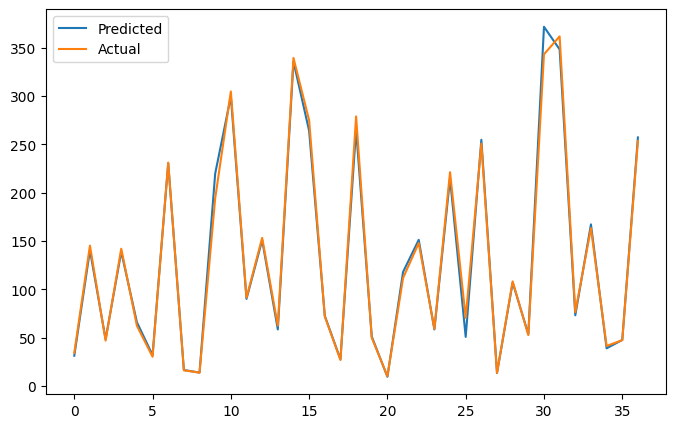

In [46]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_ridge))
plt.plot(np.array(10**(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [47]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 70.86877332867678
RMSE : 8.418359301471801
R2 : 0.9937038568509349
Adjusted R2 :  0.9931314802010198


#ML Model 3
##**Lasso Regression**

In [48]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [49]:
lasso.score(X_train, Y_train)

0.9944620239106362

In [50]:
lasso.coef_


array([ 1.07545347,  1.20865858, -0.57114806])

In [51]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [52]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.0011557311636322544


In [53]:
Y_pred_lasso = lasso_regressor.predict(X_test)

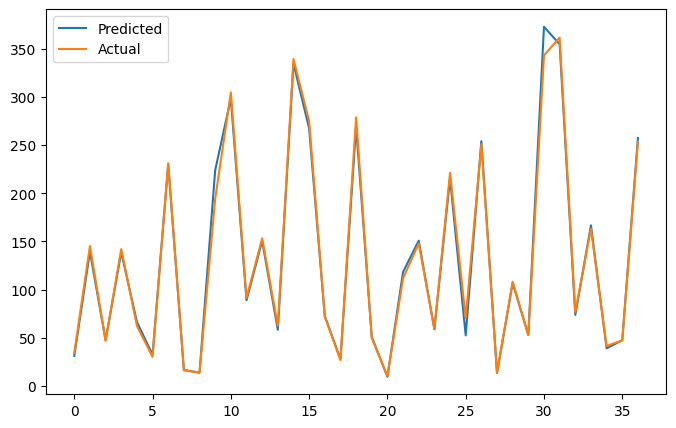

In [54]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_lasso))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [55]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 70.42041324024407
RMSE : 8.391687150999141
R2 : 0.9937436901818436
Adjusted R2 :  0.9931749347438293


#ML Model 3
## Elasticnet Regression

In [56]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [57]:
elasticnet.score(X_train,Y_train)

0.6542151045927433

In [59]:
Y_pred_en = elasticnet.predict(X_test)

In [60]:
Y_pred_en

array([1.67865454, 1.95354301, 1.79288418, 1.9402431 , 1.79480814,
       1.65750887, 2.03705228, 1.5446172 , 1.51634535, 2.00816533,
       2.09034327, 1.88567521, 1.95754011, 1.78731148, 2.10703318,
       2.04813061, 1.82058931, 1.63575315, 2.04756165, 1.765037  ,
       1.45777982, 1.90960947, 1.96772583, 1.77438704, 2.01757001,
       1.74673623, 2.06188227, 1.51251126, 1.89585037, 1.78618961,
       2.12257279, 2.09349555, 1.8146479 , 1.98112223, 1.70526746,
       1.74916892, 2.05291333])

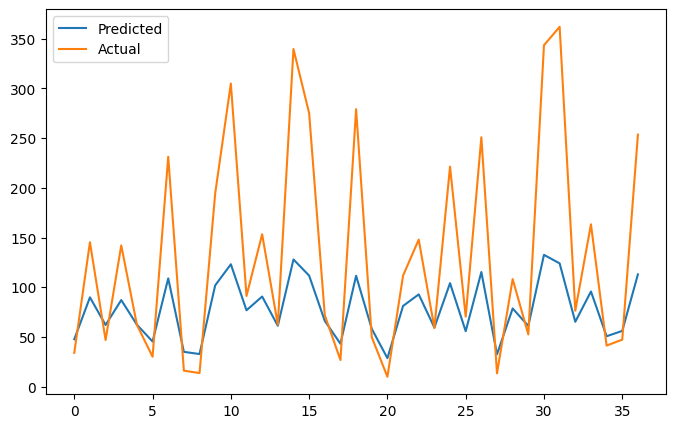

In [61]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_en))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [62]:
MSE  = mean_squared_error(10**(Y_test), 10**(Y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(Y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8963.544834229877
RMSE : 94.67599925128795
R2 : 0.20365827220353305
Adjusted R2 :  0.1312635696765816


In [63]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [64]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.3}

Using  {'alpha': 1e-08, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.00115572966766144


In [65]:
Y_pred_elastic = elastic_regressor.predict(X_test)

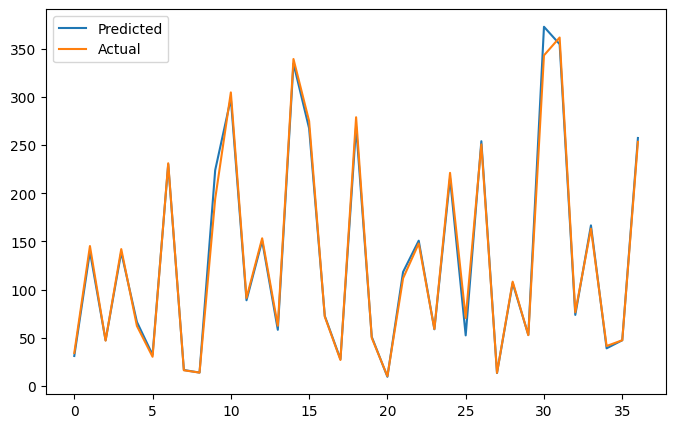

In [66]:
plt.figure(figsize=(8,5))
plt.plot(10**(Y_pred_elastic))
plt.plot(10**(np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [69]:
MSE  = mean_squared_error(10**Y_test, 10**Y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test, Y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 70.42014237714723
RMSE : 8.391671012208905
R2 : 0.9956268441762619
Adjusted R2 :  0.9931749354298977


##Conclusions##   


* In EDA part we inferred the following
1. There was an upward trend in Yes Bank's stock till 2018 and then a sudden decline was observed.This can be attributed to the Rana Kapoor fraud case.
2. We saw Linear relation between the dependent and independent variable.
3. There was a lot of multicollinearity present in data.

4. Target variable (dependent variable) is strongly dependent on independent variables.
5. We got maximum accuracy of 99% among among all the models.
6. Linear regression and lasso regression had better RMSE score than others.
7. Elasticnet regression was the worst performing model among all but when combined with GridSearchcv its performance improved.







